In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, f1_score, confusion_matrix, precision_score, recall_score

In [2]:
breast_df = pd.read_csv('merged_groundtruths_breast.csv')
kidney_df = pd.read_csv('merged_groundtruths_kidney.csv')
testis_df = pd.read_csv('merged_groundtruths_testis.csv')
print(breast_df)
print(kidney_df)
print(testis_df)

             gt_0               TF           target    importance      gt_1  \
0        0.029970  ENSG00000106459  ENSG00000110104  3.066605e-11  0.033966   
1        0.073926  ENSG00000173253  ENSG00000182676  3.764247e-11  0.023976   
2        0.083916  ENSG00000125398  ENSG00000132286  1.054526e-10  0.076923   
3        0.013986  ENSG00000128000  ENSG00000213578  1.675052e-10  0.088911   
4        0.134865  ENSG00000106261  ENSG00000066827  2.505008e-10  0.001998   
...           ...              ...              ...           ...       ...   
1746063  0.000999  ENSG00000065029  ENSG00000136878  1.106175e+01  0.044955   
1746064  0.000999  ENSG00000148308  ENSG00000157353  1.161503e+01  0.057942   
1746065  0.000999  ENSG00000012817  ENSG00000114374  1.192260e+01  0.000999   
1746066  0.000999  ENSG00000012817  ENSG00000129824  1.769474e+01  0.000999   
1746067  0.000999  ENSG00000012817  ENSG00000198692  2.765680e+01  0.000999   

             gt_2      gt_3      gt_4      gt_5    

In [3]:
results_dict = {'tissue' : [], 'gtA' : [], 'gtB' : [], 'mae': [], 'f1' : [], 'precision': [], 'recall': [], 'tp': [], 'fp': [], 'tn': [], 'fn': []}

def save_results_to_dict(tissue : str,
                         gtA : str,
                         gtB : str,
                         mae : float,
                         f1 : float,
                         results_dict : dict,
                         tn : float,
                         fp : float,
                         fn : float,
                         tp : float, 
                         precision : float,
                         recall : float):
    results_dict['tissue'].append(tissue)
    results_dict['gtA'].append(gtA)
    results_dict['gtB'].append(gtB)
    results_dict['mae'].append(mae)
    results_dict['f1'].append(f1)
    results_dict['tn'].append(tn)
    results_dict['fp'].append(fp)
    results_dict['fn'].append(fn)
    results_dict['tp'].append(tp)
    results_dict['precision'].append(precision)
    results_dict['recall'].append(recall)
    return results_dict


In [4]:

alpha = 0.05
for iA in range(10):
    for iB in range(10):
        if iA != iB:
            breast_mae = mean_absolute_error(breast_df[f'gt_{iA}'], breast_df[f'gt_{iB}'])
            breast_tn, breast_fp, breast_fn, breast_tp = confusion_matrix([1 if x <= alpha else 0 for x in breast_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in breast_df[f'gt_{iB}']]).ravel().tolist()
            breast_f1 = f1_score([1 if x <= alpha else 0 for x in breast_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in breast_df[f'gt_{iB}']])
            breast_prec = precision_score([1 if x <= alpha else 0 for x in breast_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in breast_df[f'gt_{iB}']])
            breast_recall = recall_score([1 if x <= alpha else 0 for x in breast_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in breast_df[f'gt_{iB}']])
            kidney_mae = mean_absolute_error(kidney_df[f'gt_{iA}'], kidney_df[f'gt_{iB}'])
            kidney_tn, kidney_fp, kidney_fn, kidney_tp = confusion_matrix([1 if x <= alpha else 0 for x in kidney_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in kidney_df[f'gt_{iB}']]).ravel().tolist()
            kidney_f1 = f1_score([1 if x <= alpha else 0 for x in kidney_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in kidney_df[f'gt_{iB}']])
            kidney_prec = precision_score([1 if x <= alpha else 0 for x in kidney_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in kidney_df[f'gt_{iB}']])
            kidney_recall = recall_score([1 if x <= alpha else 0 for x in kidney_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in kidney_df[f'gt_{iB}']])
            testis_mae = mean_absolute_error(testis_df[f'gt_{iA}'], testis_df[f'gt_{iB}'])
            testis_tn, testis_fp, testis_fn, testis_tp = confusion_matrix([1 if x <= alpha else 0 for x in testis_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in testis_df[f'gt_{iB}']]).ravel().tolist()
            testis_f1 = f1_score([1 if x <= alpha else 0 for x in testis_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in testis_df[f'gt_{iB}']])
            testis_prec = precision_score([1 if x <= alpha else 0 for x in testis_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in testis_df[f'gt_{iB}']])
            testis_recall = recall_score([1 if x <= alpha else 0 for x in testis_df[f'gt_{iA}']],
                                 [1 if x <= alpha else 0 for x in testis_df[f'gt_{iB}']])
            results_dict = save_results_to_dict('breast', 
                                                str(iA), 
                                                str(iB), 
                                                mae=breast_mae, 
                                                f1=breast_f1, 
                                                tn=breast_tn / (breast_tn + breast_fp), 
                                                fp=breast_fp / (breast_fp + breast_tn), 
                                                fn=breast_fn / (breast_fn + breast_tp), 
                                                tp=breast_tp / (breast_tp + breast_fn), 
                                                results_dict=results_dict,
                                                precision=breast_prec,
                                                recall=breast_recall)
            results_dict = save_results_to_dict('kidney', 
                                                str(iA), 
                                                str(iB), 
                                                mae=kidney_mae, 
                                                f1=kidney_f1, 
                                                tn=kidney_tn / (kidney_tn + kidney_fp), 
                                                fp=kidney_fp / (kidney_fp + kidney_tn), 
                                                fn=kidney_fn / (kidney_fn + kidney_tp), 
                                                tp=kidney_tp / (kidney_tp + kidney_fn), 
                                                results_dict=results_dict,
                                                precision=kidney_prec,
                                                recall=kidney_recall)
            results_dict = save_results_to_dict('testis', 
                                                str(iA), 
                                                str(iB), 
                                                mae=testis_mae, 
                                                f1=testis_f1, 
                                                tn=testis_tn / (testis_tn + testis_fp), 
                                                fp=testis_fp / (testis_fp + testis_tn), 
                                                fn=testis_fn / (testis_fn + testis_tp), 
                                                tp=testis_tp / (testis_tp + testis_fn), 
                                                results_dict=results_dict,
                                                precision=testis_prec,
                                                recall=testis_recall)


In [5]:
print(results_dict)
results_df = pd.DataFrame(results_dict)
print(results_dict)
print(results_df)

{'tissue': ['breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis', 'breast', 'kidney', 'testis'

/tmp/ipykernel_449110/1332690109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x="tissue", y="tp", palette="pastel")


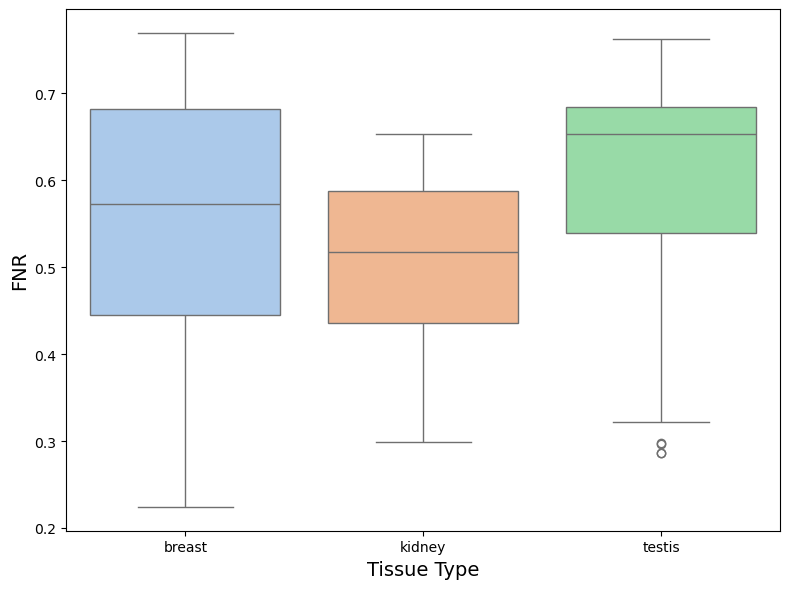

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df, x="tissue", y="tp", palette="pastel")

# Add titles and labels
#plt.title("Distribution of Groundtruth-Groundtruth F1 Scores by Tissue", fontsize=16)
plt.xlabel("Tissue Type", fontsize=14)
plt.ylabel("TPR", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_421291/4092140073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x="tissue", y="mae", palette="pastel")


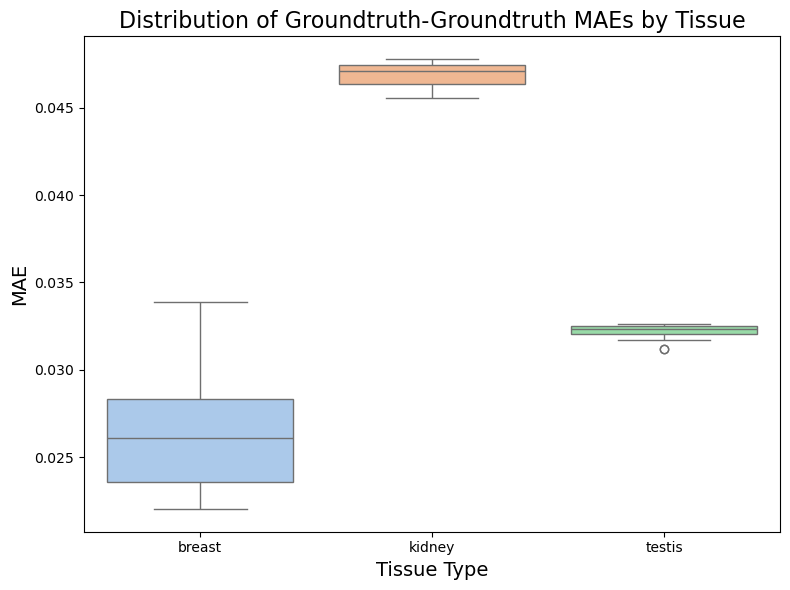

In [18]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df, x="tissue", y="mae", palette="pastel")

# Add titles and labels
plt.title("Distribution of Groundtruth-Groundtruth MAEs by Tissue", fontsize=16)
plt.xlabel("Tissue Type", fontsize=14)
plt.ylabel("MAE", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()